In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Dados

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Dados


In [3]:
%ls

 base_amostra_familia_201812.csv  'Dicionario_base_desidentificada_pt (1).xlsx'
 base_amostra_pessoa_201812.csv


## Carregando as Bases de dados

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Preparação da base Familias

In [5]:
# Carregando o dataset FAMILIAS
df_familias = pd.read_csv('base_amostra_familia_201812.csv', sep=';', quotechar='"', low_memory=False, nrows=100000)


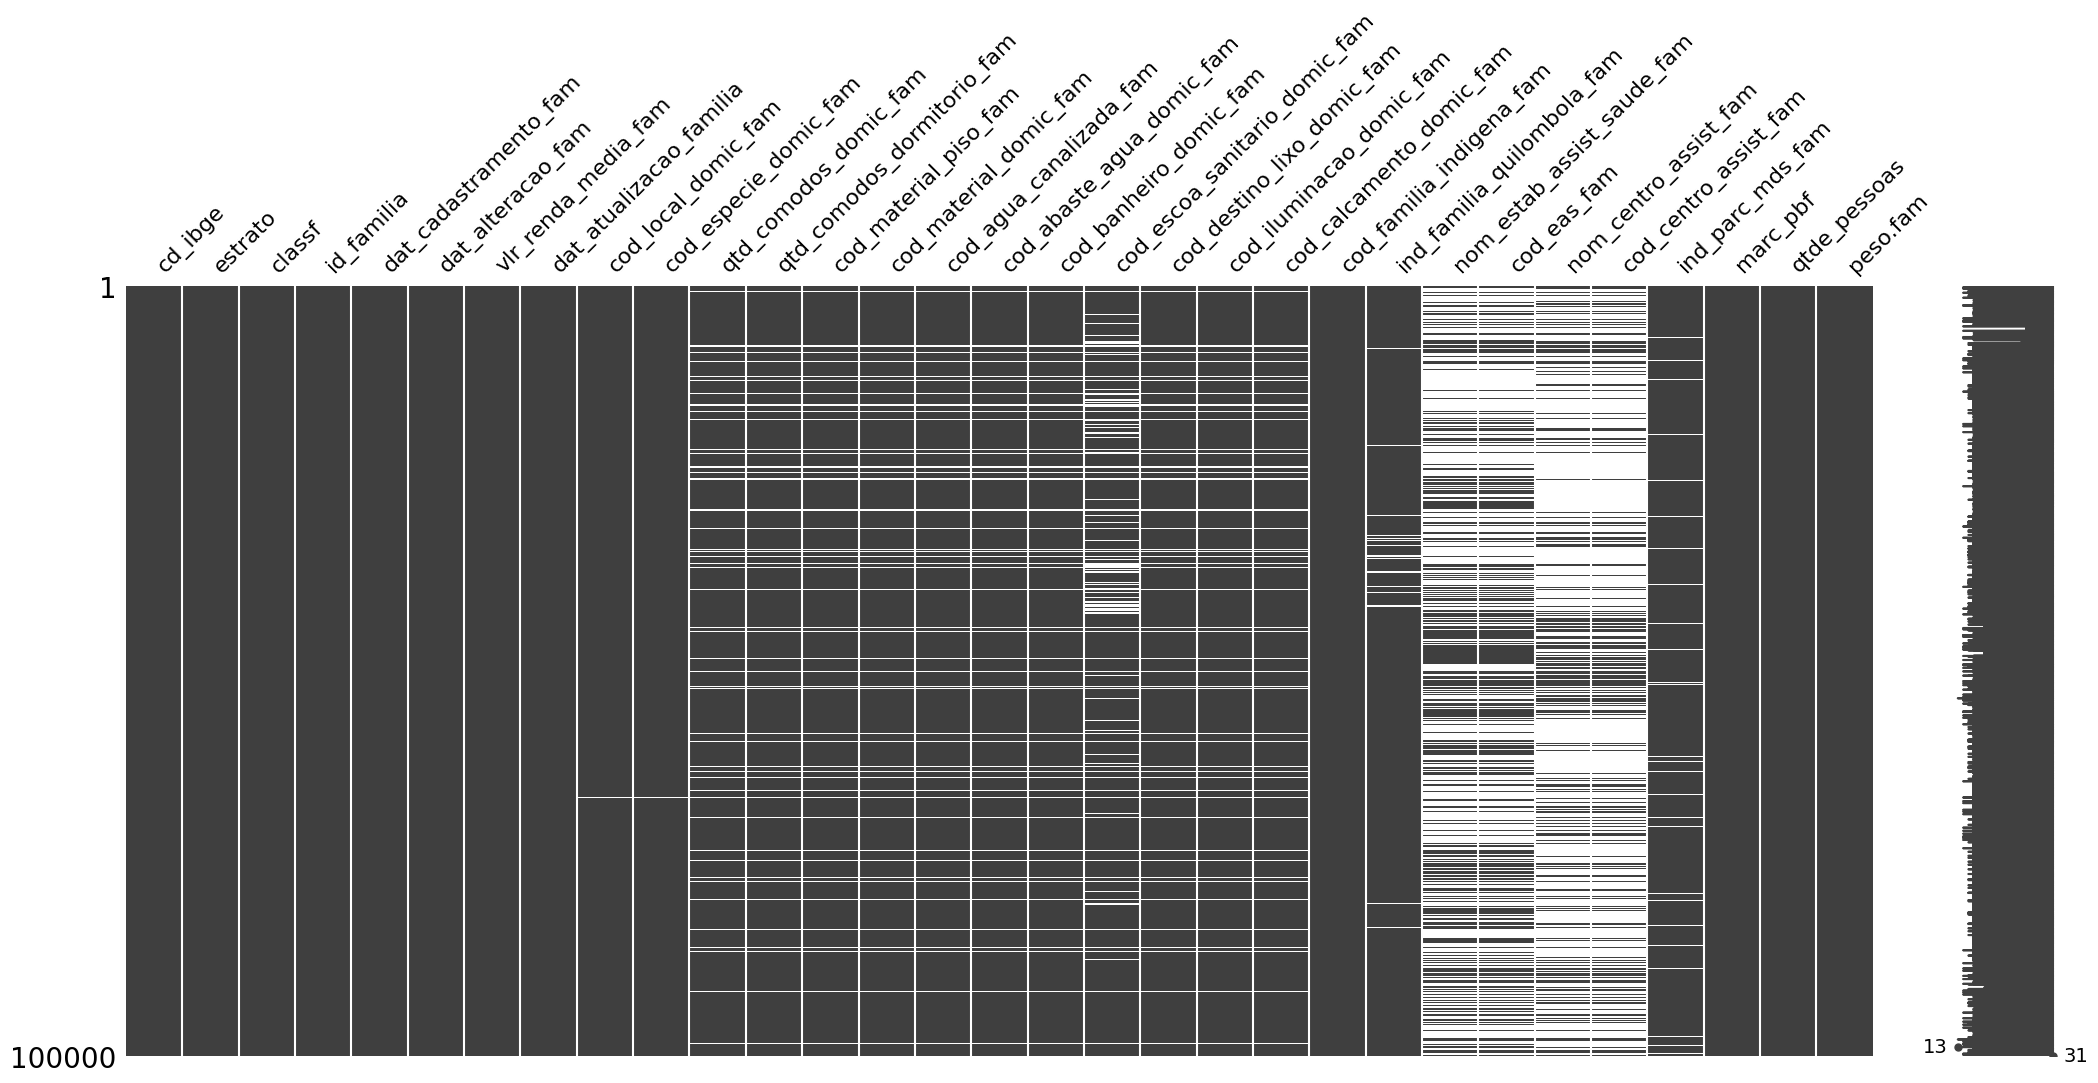

In [6]:
# Visualizando a distribuição de nulos com o missingno
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values using a matrix plot
msno.matrix(df_familias)
plt.show()

In [7]:
# Apagando os registros cujo vlr_renda_media_fam seja nulo
df_familias = df_familias.dropna(subset=['vlr_renda_media_fam'])
# Colocando zero nos nulos
df_familias = df_familias.fillna(0)
# Retirando variáveis que não serão utilizadas
df_familias = df_familias.drop(['dat_cadastramento_fam','dat_alteracao_fam','dat_atualizacao_familia','nom_estab_assist_saude_fam','cod_eas_fam','nom_centro_assist_fam','cod_centro_assist_fam'], axis=1)


In [8]:
# Definindo os valores de referência para faixas de renda
pobreza_limite = 178
baixa_renda_limite = 954 / 2

# Função para classificar a renda
def classificar_renda(renda):
    if renda <= pobreza_limite:
        return '1'
    elif renda <= baixa_renda_limite:
        return '2'
    else:
        return '3'

# Aplicando a função a cada valor de renda e criando uma nova coluna
df_familias['categoria_renda'] = df_familias['vlr_renda_media_fam'].apply(classificar_renda)
df_familias = df_familias.drop(['vlr_renda_media_fam'], axis=1)



<Axes: xlabel='categoria_renda'>

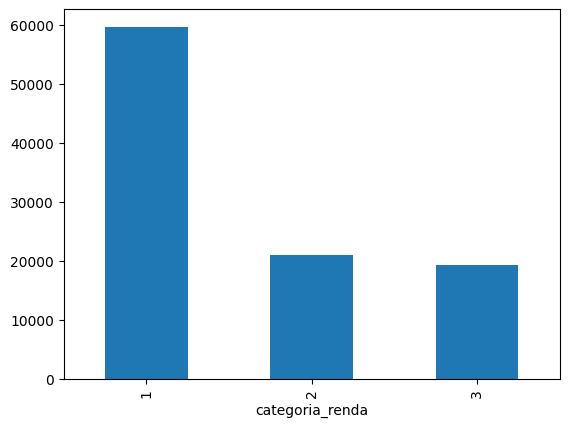

In [9]:
# Mostra balanceamento das classes (gráfico de barras )
df_familias.categoria_renda.value_counts().plot(kind='bar')

<Axes: xlabel='regiao'>

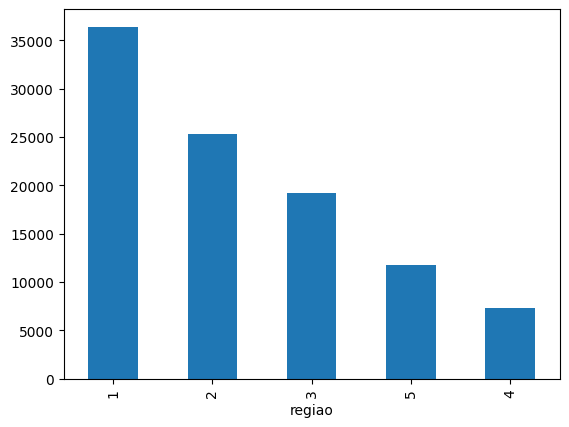

In [10]:
# Definindo um dicionário para as regiões do Brasil
regions = {
    '11': '1', '12': '1', '13': '1', '14': '1', '15': '1', '16': '1', '17': '1', #Norte
    '21': '2', '22': '2', '23': '2', '24': '2', '25': '2', '26': '2', '27': '2', '28': '2', '29': '2', #Nordeste
    '31': '3', '32': '3', '33': '3', '35': '3', #Sudeste
    '41': '4', '42': '4', '43': '4', #Sul
    '50': '5', '51': '5', '52': '5', '53': '5' #Centro-Oeste
}

# Cria uma nova coluga 'uf_ibge' com os primeiros dois caracteres de 'cd_ibge'
df_familias['uf_ibge'] = df_familias['cd_ibge'].astype(str).str[:2]

# Cria uma nova coluna 'regiao' baseada no 'uf_ibge' e o dicionário de regiões
df_familias['regiao'] = df_familias['uf_ibge'].map(regions)

# Mostra o dataframe atuailzado
df_familias.regiao.value_counts().plot(kind='bar')



## Preparação da Base Pessoas

In [11]:
# Carregando o dataset PESSOAS
df_pessoas = pd.read_csv('base_amostra_pessoa_201812.csv', sep=';', quotechar='"',low_memory=False, nrows=100000)

## Características do Responsável Familiar

In [12]:
# Definindo as novas variáveis
df_pessoas['rf_mulher'] = df_pessoas.apply(lambda row: 1 if row['cod_parentesco_rf_pessoa'] == 1 and row['cod_sexo_pessoa'] == 2 else 0, axis=1)
df_pessoas['rf_branca'] = df_pessoas.apply(lambda row: 1 if row['cod_raca_cor_pessoa'] == 1 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_preta'] = df_pessoas.apply(lambda row: 1 if row['cod_raca_cor_pessoa'] == 2 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_amarela'] = df_pessoas.apply(lambda row: 1 if row['cod_raca_cor_pessoa'] == 3 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_parda'] = df_pessoas.apply(lambda row: 1 if row['cod_raca_cor_pessoa'] == 4 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_indigena'] = df_pessoas.apply(lambda row: 1 if row['cod_raca_cor_pessoa'] == 5 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_deficiencia'] = df_pessoas.apply(lambda row: 1 if row['cod_deficiencia_memb'] == 1 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_ler_escrever'] = df_pessoas.apply(lambda row: 1 if row['cod_sabe_ler_escrever_memb'] == 1 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_creche'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 1 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_pre_escolar'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 2 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_alfabetizacao'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 3 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_fund1'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 4 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_fund2'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 5 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_fund9anos'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 6 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_fund_Especial'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 7 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_ensino_medio'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 8 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_medio_Especial'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 9 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_supletivo1'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 10 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_supletivo2'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 11 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_supletivo_eja'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 12 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_superior'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 13 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_alfabetizacao_adulto'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 14 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_escolaridade_alfabetizacao_nenhum'] = df_pessoas.apply(lambda row: 1 if row['cod_curso_frequentou_pessoa_memb'] == 15 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_curso_concluido'] = df_pessoas.apply(lambda row: 1 if row['cod_concluiu_frequentou_memb'] == 1 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_trabalhou'] = df_pessoas.apply(lambda row: 1 if row['cod_trabalhou_memb'] == 1 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_afastado_trablho'] = df_pessoas.apply(lambda row: 1 if row['cod_afastado_trab_memb'] == 1 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)
df_pessoas['rf_qtd_meses_12_meses_memb'] = df_pessoas.apply(lambda row: 1 if row['qtd_meses_12_meses_memb'] == 1 and row['cod_parentesco_rf_pessoa'] == 1 else 0, axis=1)

# Exibindo as primeiras linhas do DataFrame para verificar as novas colunas
print(df_pessoas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 62 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   cd_ibge                               100000 non-null  int64  
 1   estrato                               100000 non-null  int64  
 2   classf                                100000 non-null  int64  
 3   id_familia                            100000 non-null  int64  
 4   id_pessoa                             100000 non-null  float64
 5   cod_sexo_pessoa                       100000 non-null  int64  
 6   idade                                 100000 non-null  int64  
 7   cod_parentesco_rf_pessoa              100000 non-null  int64  
 8   cod_raca_cor_pessoa                   99968 non-null   float64
 9   cod_local_nascimento_pessoa           99584 non-null   float64
 10  cod_certidao_registrada_pessoa        100000 non-null  int64  
 11  c

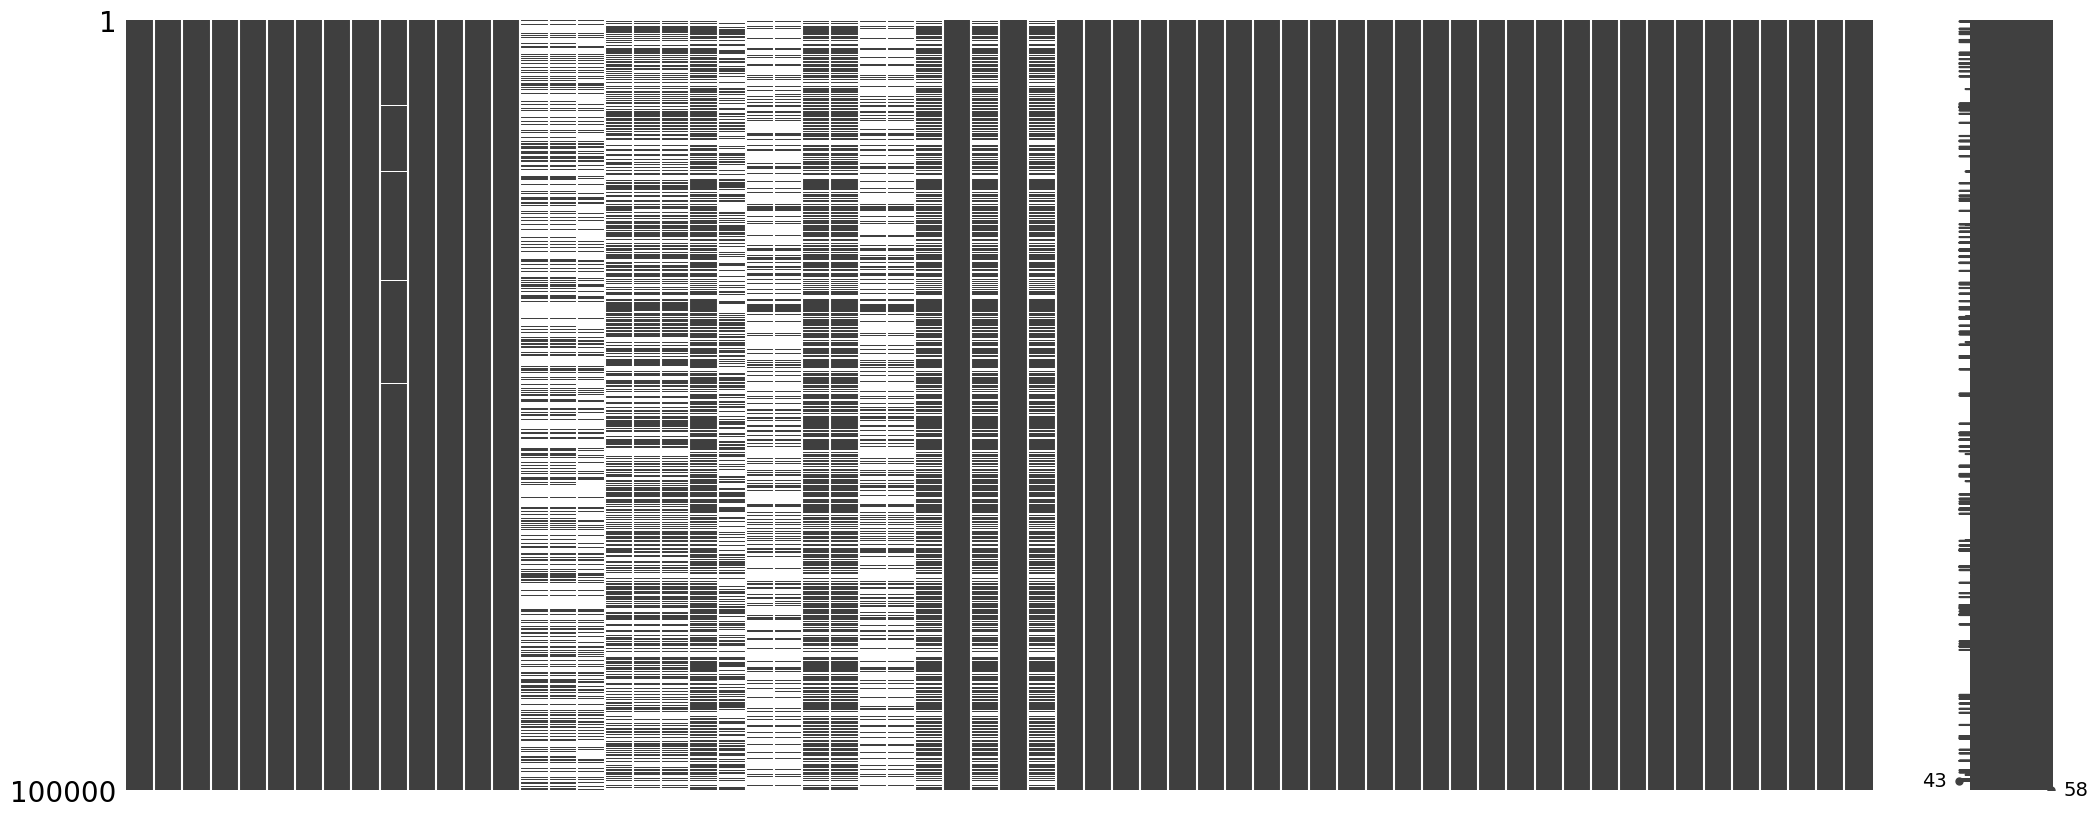

In [13]:
# Visualizando a distribuição de nulos com o missingno
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values using a matrix plot
msno.matrix(df_pessoas)
plt.show()

In [14]:
## Preparação de PESSOAS
df_pessoas = df_pessoas[df_pessoas['cod_parentesco_rf_pessoa'] == 1]
df_pessoas = df_pessoas.fillna(0)
df_pessoas = df_pessoas.drop(['cd_ibge','cod_parentesco_rf_pessoa'], axis=1)


In [16]:
# Unindo os datasets
df_completo = pd.merge(df_familias, df_pessoas, on='id_familia')
# Selecting specific columns using square brackets []
df_completo = df_completo[['rf_mulher', 'rf_branca', 'rf_preta', 'rf_amarela', 'rf_parda', 'rf_indigena', 'rf_deficiencia', 'rf_ler_escrever', 'rf_escolaridade_creche', 'rf_escolaridade_pre_escolar', 'rf_escolaridade_alfabetizacao' , 'rf_escolaridade_fund1', 'rf_escolaridade_fund2', 'rf_escolaridade_fund9anos', 'rf_escolaridade_fund_Especial', 'rf_escolaridade_ensino_medio', 'rf_escolaridade_medio_Especial', 'rf_escolaridade_supletivo1', 'rf_escolaridade_supletivo2', 'rf_escolaridade_supletivo_eja', 'rf_escolaridade_superior', 'rf_escolaridade_alfabetizacao_adulto', 'rf_escolaridade_alfabetizacao_nenhum', 'rf_curso_concluido','rf_trabalhou','rf_afastado_trablho','rf_qtd_meses_12_meses_memb', 'categoria_renda']]
# Movendo a coluna 'categoria_renda' para o final do DataFrame
# Obtém a coluna a ser movida
coluna_movida = df_completo['categoria_renda']
# Remove a coluna do DataFrame original
df_completo = df_completo.drop('categoria_renda', axis=1)
# Insere a coluna no final do DataFrame
df_completo.insert(len(df_completo.columns), 'categoria_renda', coluna_movida)

In [17]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   rf_mulher                             801 non-null    int64 
 1   rf_branca                             801 non-null    int64 
 2   rf_preta                              801 non-null    int64 
 3   rf_amarela                            801 non-null    int64 
 4   rf_parda                              801 non-null    int64 
 5   rf_indigena                           801 non-null    int64 
 6   rf_deficiencia                        801 non-null    int64 
 7   rf_ler_escrever                       801 non-null    int64 
 8   rf_escolaridade_creche                801 non-null    int64 
 9   rf_escolaridade_pre_escolar           801 non-null    int64 
 10  rf_escolaridade_alfabetizacao         801 non-null    int64 
 11  rf_escolaridade_fund1           

## Seleção das variáveis independentes (Features)

## Separação dos dados de treinamento e validação

In [44]:
# Atribuir valores para X e y
X = df_completo.iloc[:,:-1]
y = df_completo.iloc[:,-1:]

## Treinando o modelo

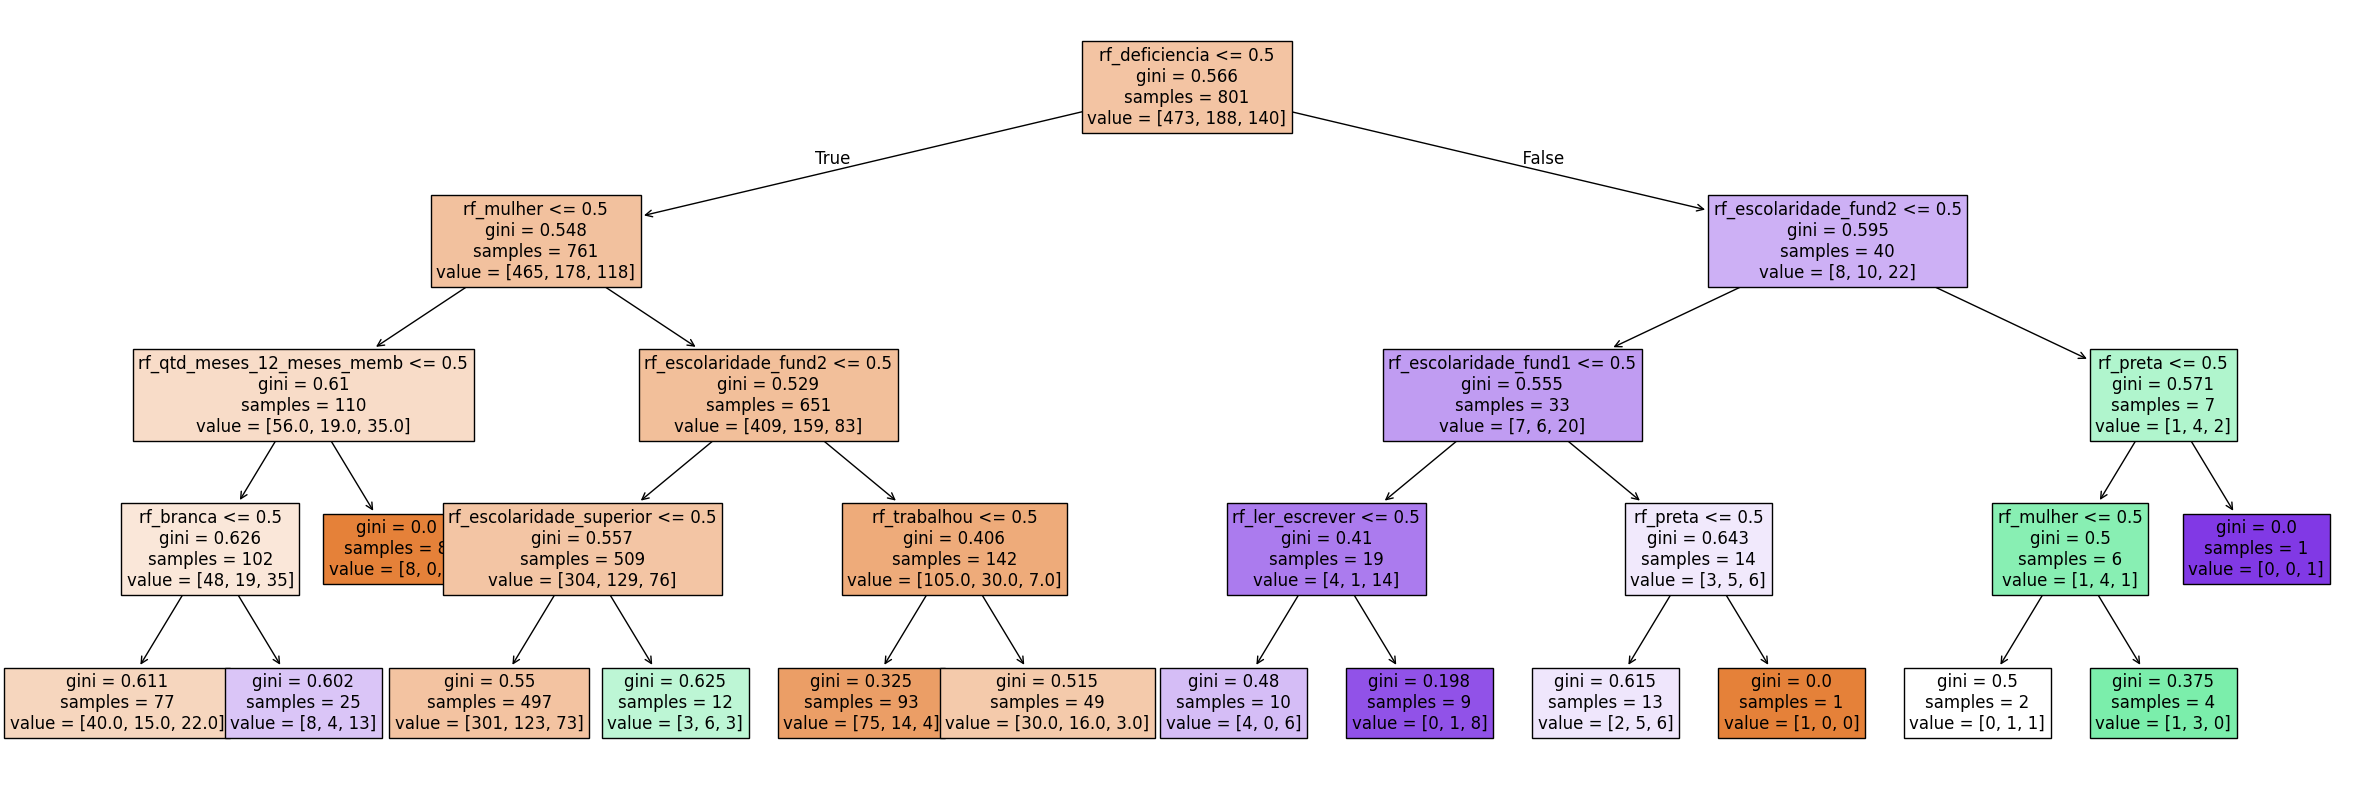

In [45]:
# Criar árvore de decisão e plotar a árvore (plot_tree)
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4).fit(X, y)

plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, fontsize=12, feature_names=X.columns)
plt.show()

In [46]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Árvore de decisão
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = SelectKBest(f_classif, k=2).fit_transform(X, y)
clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8  9 22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


0.5892116182572614

In [48]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(solver='lbfgs',max_iter=3000).fit(X_train, y_train)
reg_log.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5975103734439834

In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf_class = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=100).fit(X_train, np.ravel(y_train))
rf_class.score(X_test, y_test)

0.6141078838174274

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

A árvore com o melhor desempenho é a árvore 0 com um score de 0.0000


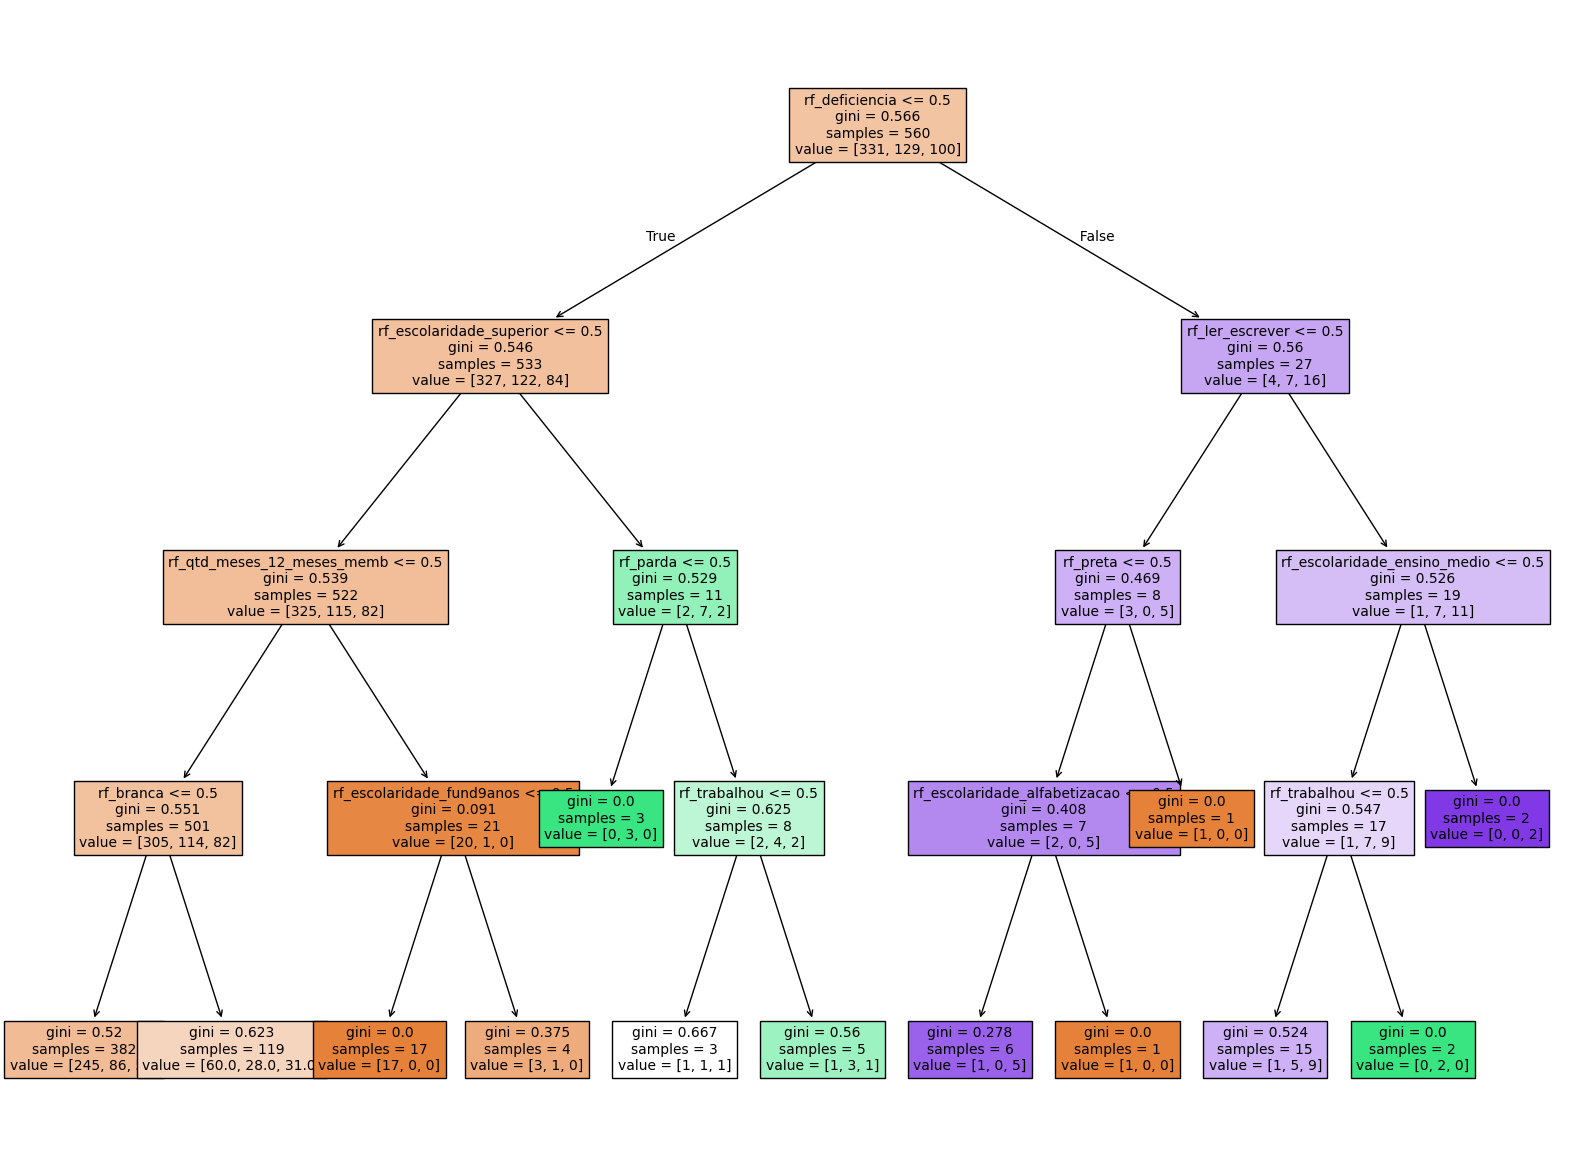

In [51]:
# import warnings
# warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
# Treinar uma Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=100)  # Exemplo com 10 árvores
rf.fit(X_train, np.ravel(y_train))

# Avaliar o desempenho de cada árvore individual
best_score = 0
best_tree_index = 0

for i, tree in enumerate(rf.estimators_):
    # Previsão da árvore individual
    y_pred_tree = tree.predict(X_test)

    # Calcular o accuracy score da árvore nos dados de teste
    score = accuracy_score(y_test, np.ravel(y_pred_tree))

    # Encontrar a árvore com o melhor score
    if score > best_score:
        best_score = score
        best_tree_index = i

print(f'A árvore com o melhor desempenho é a árvore {best_tree_index} com um score de {best_score:.4f}')

# Acessando a árvore com o melhor desempenho
best_tree = rf.estimators_[best_tree_index]

# Opcional: Visualizar a árvore
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
# Assuming 'X_train' is a pandas DataFrame and has the original feature names
# If not, replace 'X_train' with the original DataFrame containing the feature names
# or create a list of feature names manually
feature_names = X_train.columns # changed code: obtain feature names from X_train, or original DataFrame with feature names
plot_tree(clf, filled=True, fontsize=10, feature_names=feature_names) # changed code: using feature_names in plot_tree
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

A árvore com o melhor desempenho é a árvore 0 com um score de 0.0000


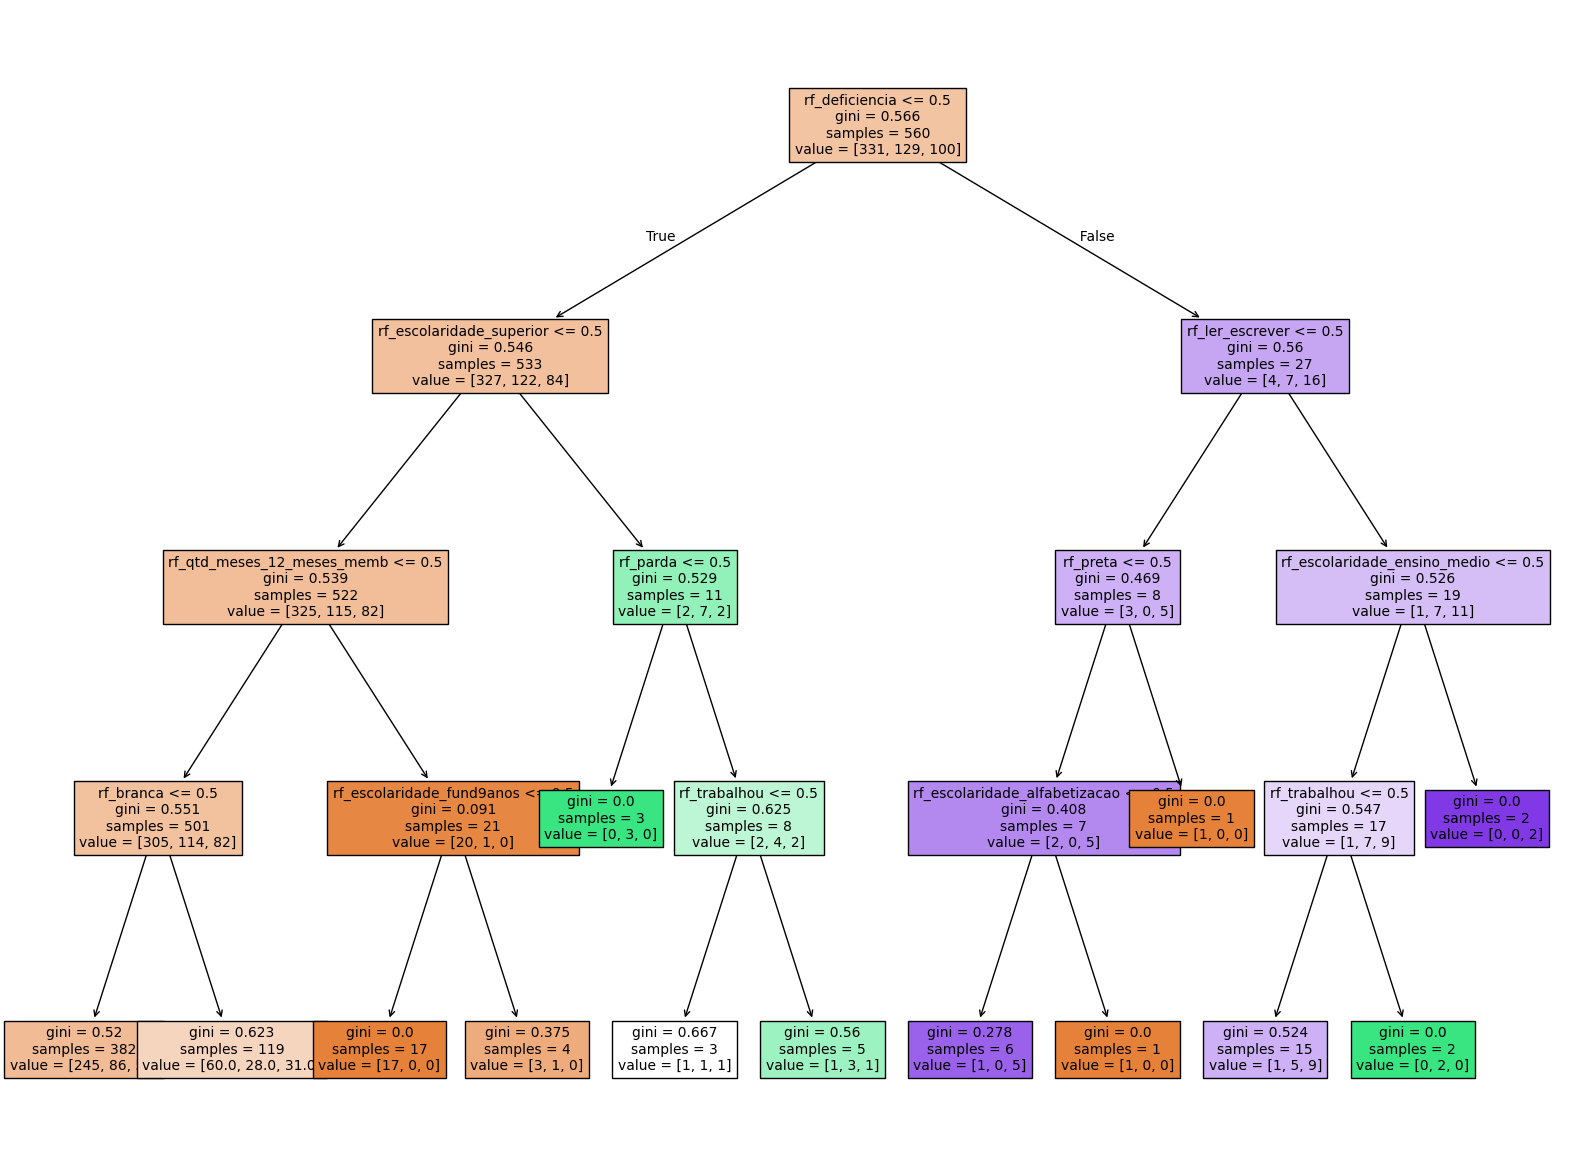

In [52]:
# import warnings
# warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
# Treinar uma Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=100)  # Exemplo com 10 árvores
rf.fit(X_train, np.ravel(y_train))

# Avaliar o desempenho de cada árvore individual
best_score = 0
best_tree_index = 0

for i, tree in enumerate(rf.estimators_):
    # Previsão da árvore individual
    y_pred_tree = tree.predict(X_test)

    # Calcular o accuracy score da árvore nos dados de teste
    score = accuracy_score(y_test, np.ravel(y_pred_tree))

    # Encontrar a árvore com o melhor score
    if score > best_score:
        best_score = score
        best_tree_index = i

print(f'A árvore com o melhor desempenho é a árvore {best_tree_index} com um score de {best_score:.4f}')

# Acessando a árvore com o melhor desempenho
best_tree = rf.estimators_[best_tree_index]

# Opcional: Visualizar a árvore
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True, fontsize=10, feature_names=X_train.columns)
plt.show()